In [12]:
import numpy as np
import pandas as pd
import torch
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# 生成示例多元时间序列数据
num_samples = 100
input_len = 10
output_len = 3
input_channels = 2
output_channels = 2

# 创建随机数据
data = np.random.rand(num_samples, input_len + output_len, input_channels)
X = data[:, :input_len, :]  # 输入
y = data[:, input_len:, :]   # 输出

# 训练 SVR 模型
scalers = []
predictions = []

for sample in range(num_samples):
    # 准备输入数据
    X_sample = X[sample].reshape(-1, input_channels)  # (input_len, input_channels)
    y_sample = y[sample].reshape(-1, output_channels)  # (output_len, output_channels)

    # 标准化数据
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_scaled = scaler_X.fit_transform(X_sample)
    y_scaled = scaler_y.fit_transform(y_sample)

    # 训练 SVR 模型
    svr = SVR(kernel='rbf')
    svr.fit(X_scaled, y_scaled)

    # 预测
    y_pred_scaled = svr.predict(X_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)

    # 将预测结果保存
    predictions.append(y_pred.reshape(output_len, output_channels))

# 转换为Tensor
predictions_tensor = torch.Tensor(predictions)

# 打印预测结果形状
print(f'预测结果形状: {predictions_tensor.shape}')  # 应该是 (num_samples, output_len, output_channels)

# 可视化结果（可选）
import matplotlib.pyplot as plt

for i in range(min(5, num_samples)):  # 展示前5个样本
    plt.figure()
    plt.plot(y[i], label='真实值')
    plt.plot(predictions[i], label='预测值', linestyle='--')
    plt.title(f'样本 {i + 1}')
    plt.legend()
    plt.show()


ValueError: y should be a 1d array, got an array of shape (3, 2) instead.

Epoch 1/10, Loss: 0.4007
Epoch 2/10, Loss: 0.3882
Epoch 3/10, Loss: 0.3758
Epoch 4/10, Loss: 0.3606
Epoch 5/10, Loss: 0.3420
Epoch 6/10, Loss: 0.3180
Epoch 7/10, Loss: 0.2865
Epoch 8/10, Loss: 0.2462
Epoch 9/10, Loss: 0.1979
Epoch 10/10, Loss: 0.1469
预测结果形状: torch.Size([100, 3, 2])


d:\Anaconda3\envs\env_py312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\envs\env_py312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\envs\env_py312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\envs\env_py312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda3\envs\env_py312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from fon

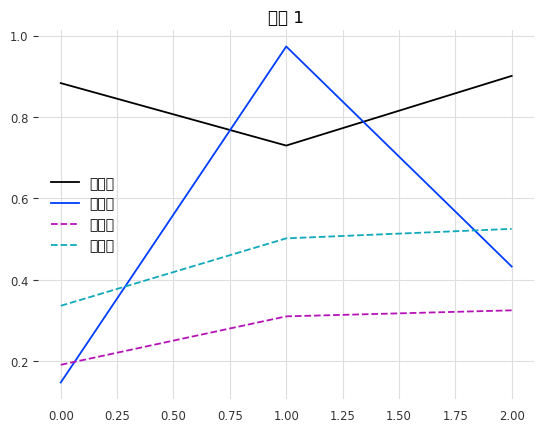

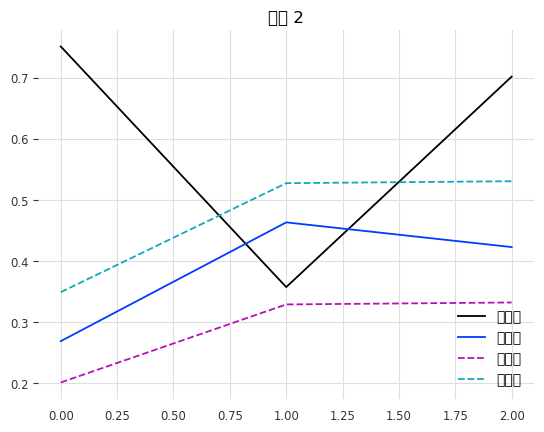

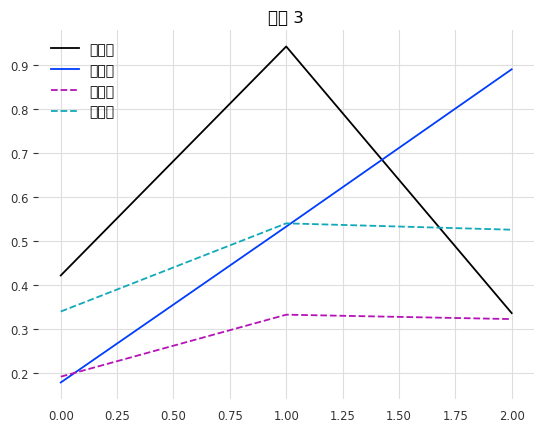

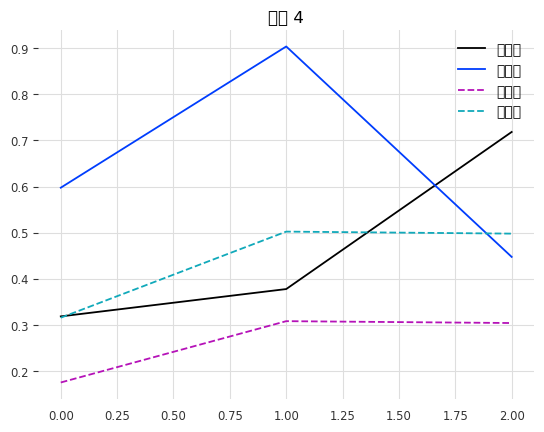

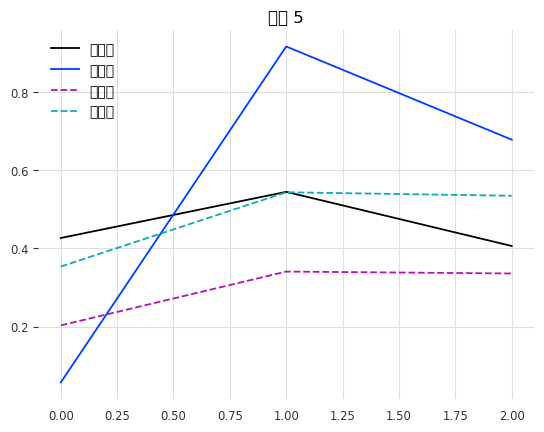

In [13]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt





# 超参数设置
batch_size = 16
input_len = 10
output_len = 3
input_channels = 2
output_channels = 2
num_blocks = 4
kernel_size = 3
num_samples = 100

# 生成随机数据
data = np.random.rand(num_samples, input_len + output_len, input_channels)
X = data[:, :input_len, :]  # 输入
y = data[:, input_len:, :]   # 输出

# 转换为PyTorch Tensor
X_tensor = torch.Tensor(X)
y_tensor = torch.Tensor(y)

# 创建模型
model = TCN(input_channels, output_channels, num_blocks, kernel_size, output_len)

# 示例训练
num_epochs = 10
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 训练模型
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()  # 清零梯度
    
    outputs = model(X_tensor)  # 前向传播
    loss = loss_fn(outputs, y_tensor)  # 计算损失
    loss.backward()  # 反向传播
    optimizer.step()  # 更新权重
    
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}')

# 示例预测
model.eval()
with torch.no_grad():
    predictions = model(X_tensor)

# 打印预测结果形状
print(f'预测结果形状: {predictions.shape}')  # 应该是 (num_samples, output_len, output_channels)

# 可视化前几个样本的预测结果
for i in range(min(5, num_samples)):  # 展示前5个预测结果
    plt.figure()
    plt.plot(y[i], label='真实值')
    plt.plot(predictions[i].numpy(), label='预测值', linestyle='--')
    plt.title(f'样本 {i + 1}')
    plt.legend()
    plt.show()
